# Déployez un modèle dans le cloud


# Sommaire :

**1. Préambule**<br />
&emsp;1.1 Problématique<br />
&emsp;1.2 Objectifs dans ce projet<br />
&emsp;1.3 Déroulement des étapes du projet<br />
**2. Choix techniques généraux retenus**<br />
&emsp;2.1 Calcul distribué<br />
&emsp;2.2 Transfert Learning<br />
**3. Déploiement de la solution en local**<br />
&emsp;3.1 Environnement de travail<br />
&emsp;3.2 Installation de Spark<br />
&emsp;3.3 Installation des packages<br />
&emsp;3.4 Import des librairies<br />
&emsp;3.5 Définition des PATH pour charger les images et enregistrer les résultats<br />
&emsp;3.6 Création de la SparkSession<br />
&emsp;3.7 Traitement des données<br />
&emsp;&emsp;3.7.1 Chargement des données<br />
&emsp;&emsp;3.7.2 Préparation du modèle<br />
&emsp;&emsp;3.7.3 Définition du processus de chargement des images et application <br />
&emsp;&emsp;&emsp;&emsp;&emsp;de leur featurisation à travers l'utilisation de pandas UDF<br />
&emsp;&emsp;3.7.4 Exécution des actions d'extractions de features<br />
&emsp;3.8 Chargement des données enregistrées et validation du résultat<br />
**4. Déploiement de la solution sur le cloud**<br />
&emsp;4.1 Choix du prestataire cloud : AWS<br />
&emsp;4.2 Choix de la solution technique : EMR<br />
&emsp;4.3 Choix de la solution de stockage des données : Amazon S3<br />
&emsp;4.4 Configuration de l'environnement de travail<br />
&emsp;4.5 Upload de nos données sur S3<br />
&emsp;4.6 Configuration du serveur EMR<br />
&emsp;&emsp;4.6.1 Étape 1 : Logiciels et étapes<br />
&emsp;&emsp;&emsp;4.6.1.1 Configuration des logiciels<br />
&emsp;&emsp;&emsp;4.6.1.2 Modifier les paramètres du logiciel<br />
&emsp;&emsp;4.6.2 Étape 2 : Matériel<br />
&emsp;&emsp;4.6.3 Étape 3 : Paramètres de cluster généraux<br />
&emsp;&emsp;&emsp;4.6.3.1 Options générales<br />
&emsp;&emsp;&emsp;4.6.3.2 Actions d'amorçage<br />
&emsp;&emsp;4.6.4 Étape 4 : Sécurité<br />
&emsp;&emsp;&emsp;4.6.4.1 Options de sécurité<br />
&emsp;4.7 Instanciation du serveur<br />
&emsp;4.8 Création du tunnel SSH à l'instance EC2 (Maître)<br />
&emsp;&emsp;4.8.1 Création des autorisations sur les connexions entrantes<br />
&emsp;&emsp;4.8.2 Création du tunnel ssh vers le Driver<br />
&emsp;&emsp;4.8.3 Configuration de FoxyProxy<br />
&emsp;&emsp;4.8.4 Accès aux applications du serveur EMR via le tunnel ssh<br />
&emsp;4.9 Connexion au notebook JupyterHub<br />
&emsp;4.10 Exécution du code<br />
&emsp;&emsp;4.10.1 Démarrage de la session Spark<br />
&emsp;&emsp;4.10.2 Installation des packages<br />
&emsp;&emsp;4.10.3 Import des librairies<br />
&emsp;&emsp;4.10.4 Définition des PATH pour charger les images et enregistrer les résultats<br />
&emsp;&emsp;4.10.5 Traitement des données<br />
&emsp;&emsp;&emsp;4.10.5.1 Chargement des données<br />
&emsp;&emsp;&emsp;4.10.5.2 Préparation du modèle<br />
&emsp;&emsp;&emsp;4.10.5.3 Définition du processus de chargement des images<br />
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;et application de leur featurisation à travers l'utilisation de pandas UDF<br />
&emsp;&emsp;&emsp;4.10.5.4 Exécutions des actions d'extractions de features<br />
&emsp;&emsp;4.10.6 Chargement des données enregistrées et validation du résultat<br />
&emsp;4.11 Suivi de l'avancement des tâches avec le Serveur d'Historique Spark<br />
&emsp;4.12 Résiliation de l'instance EMR<br />
&emsp;4.13 Cloner le serveur EMR (si besoin)<br />
&emsp;4.14 Arborescence du serveur S3 à la fin du projet<br />
**5. Conclusion**

# 1. Préambule

## 1.1 Problématique

La très jeune start-up de l'AgriTech, nommée "**Fruits**!", <br />
cherche à proposer des solutions innovantes pour la récolte des fruits.

La volonté de l’entreprise est de préserver la biodiversité des fruits <br />
en permettant des traitements spécifiques pour chaque espèce de fruits <br />
en développant des robots cueilleurs intelligents.

La start-up souhaite dans un premier temps se faire connaître en mettant <br />
à disposition du grand public une application mobile qui permettrait aux <br />
utilisateurs de prendre en photo un fruit et d'obtenir des informations sur ce fruit.

Pour la start-up, cette application permettrait de sensibiliser le grand public <br /> 
à la biodiversité des fruits et de mettre en place une première version du moteur <br />
de classification des images de fruits.

De plus, le développement de l’application mobile permettra de construire <br />
une première version de l'architecture **Big Data** nécessaire.

## 1.2 Objectifs dans ce projet

1. Développer une première chaîne de traitement des données qui <br />
   comprendra le **preprocessing** et une étape de **réduction de dimension**.
2. Tenir compte du fait que <u>le volume de données va augmenter <br />
   très rapidement</u> après la livraison de ce projet, ce qui implique de:
 - Déployer le traitement des données dans un environnement **Big Data**
 - Développer les scripts en **pyspark** pour effectuer du **calcul distribué**

## 1.3 Déroulement des étapes du projet

Le projet va être réalisé en 2 temps, dans deux environnements différents. <br />
Nous allons dans un premier temps développer et exécuter notre code en local, <br />
en travaillant sur un nombre limité d'images à traiter.

Une fois les choix techniques validés, nous déploierons notre solution <br />
dans un environnement Big Data en mode distribué.

<u>Pour cette raison, ce projet sera divisé en 3 parties</u>:
1. Liste des choix techniques généraux retenus
2. Déploiement de la solution en local
3. Déploiement de la solution dans le cloud

# 2. Choix techniques généraux retenus

## 2.1 Calcul distribué

L’énoncé du projet nous impose de développer des scripts en **pyspark** <br />
afin de <u>prendre en compte l’augmentation très rapide du volume <br />
de donné après la livraison du projet</u>.

Pour comprendre rapidement et simplement ce qu’est **pyspark** <br />
et son principe de fonctionnement, nous vous conseillons de lire <br />
cet article : [PySpark : Tout savoir sur la librairie Python](https://datascientest.com/pyspark)

<u>Le début de l’article nous dit ceci </u>:<br />
« *Lorsque l’on parle de traitement de bases de données sur python, <br />
on pense immédiatement à la librairie pandas. Cependant, lorsqu’on a <br />
affaire à des bases de données trop massives, les calculs deviennent trop lents.<br />
Heureusement, il existe une autre librairie python, assez proche <br />
de pandas, qui permet de traiter des très grandes quantités de données : PySpark.<br />
Apache Spark est un framework open-source développé par l’AMPLab <br />
de UC Berkeley permettant de traiter des bases de données massives <br />
en utilisant le calcul distribué, technique qui consiste à exploiter <br />
plusieurs unités de calcul réparties en clusters au profit d’un seul <br />
projet afin de diviser le temps d’exécution d’une requête.<br />
Spark a été développé en Scala et est au meilleur de ses capacités <br />
dans son langage natif. Cependant, la librairie PySpark propose de <br />
l’utiliser avec le langage Python, en gardant des performances <br />
similaires à des implémentations en Scala.<br />
Pyspark est donc une bonne alternative à la librairie pandas lorsqu’on <br />
cherche à traiter des jeux de données trop volumineux qui entraînent <br />
des calculs trop chronophages.* »

Comme nous le constatons, **pySpark** est un moyen de communiquer <br />
avec **Spark** via le langage **Python**.<br />
**Spark**, quant à lui, est un outil qui permet de gérer et de coordonner <br />
l'exécution de tâches sur des données à travers un groupe d'ordinateurs. <br />
<u>Spark (ou Apache Spark) est un framework open source de calcul distribué <br />
in-memory pour le traitement et l'analyse de données massives</u>.

Un autre [article très intéressant et beaucoup plus complet pour <br />
comprendre le **fonctionnement de Spark**](https://www.veonum.com/apache-spark-pour-les-nuls/), ainsi que le rôle <br />
des **Spark Session** que nous utiliserons dans ce projet.

<u>Voici également un extrait</u>:

*Les applications Spark se composent d’un pilote (« driver process ») <br />
et de plusieurs exécuteurs (« executor processes »). Il peut être configuré <br />
pour être lui-même l’exécuteur (local mode) ou en utiliser autant que <br />
nécessaire pour traiter l’application, Spark prenant en charge la mise <br />
à l’échelle automatique par une configuration d’un nombre minimum <br />
et maximum d’exécuteurs.*

![Schéma de Spark](img/spark-schema.png)

*Le driver (parfois appelé « Spark Session ») distribue et planifie <br />
les tâches entre les différents exécuteurs qui les exécutent et permettent <br />
un traitement réparti. Il est le responsable de l’exécution du code <br />
sur les différentes machines.

Chaque exécuteur est un processus Java Virtual Machine (JVM) distinct <br />
dont il est possible de configurer le nombre de CPU et la quantité de <br />
mémoire qui lui est alloué. <br />
Une seule tâche peut traiter un fractionnement de données à la fois.*

Dans les deux environnements (Local et Cloud) nous utiliserons donc **Spark** <br />
et nous l’exploiterons à travers des scripts python grâce à **PySpark**.

Dans la <u>version locale</u> de notre script nous **simulerons <br />
le calcul distribué** afin de valider que notre solution fonctionne.<br />
Dans la <u>version cloud</u> nous **réaliserons les opérations sur un cluster de machine**.

## 2.2 Transfert Learning

L'énoncé du projet nous demande également de <br />
réaliser une première chaîne de traitement <br />
des données qui comprendra le preprocessing et <br />
une étape de réduction de dimension.

Il est également précisé qu'il n'est pas nécessaire <br />
d'entraîner un modèle pour le moment.

Nous décidons de partir sur une solution de **transfert learning**.

Simplement, le **transfert learning** consiste <br />
à utiliser la connaissance déjà acquise <br />
par un modèle entraîné (ici **MobileNetV2**) pour <br />
l'adapter à notre problématique.

Nous allons fournir au modèle nos images, et nous allons <br />
<u>récupérer l'avant dernière couche</u> du modèle.<br />
En effet la dernière couche de modèle est une couche softmax <br />
qui permet la classification des images ce que nous ne <br />
souhaitons pas dans ce projet.

L'avant dernière couche correspond à un **vecteur <br />
réduit** de dimension (1,1,1280).

Cela permettra de réaliser une première version du moteur <br />
pour la classification des images des fruits.

**MobileNetV2** a été retenu pour sa <u>rapidité d'exécution</u>, <br />
particulièrement adaptée pour le traitement d'un gros volume <br />
de données ainsi que la <u>faible dimensionnalité du vecteur <br />
de caractéristique en sortie</u> (1,1,1280)

# 3. Déploiement de la solution en local


## 3.1 Environnement de travail

Pour des raisons de simplicité, nous développons dans un environnement <br />
Linux Unbuntu (exécuté depuis une machine Windows dans une machine virtuelle)
* Pour installer une machine virtuelle :  https://www.malekal.com/meilleurs-logiciels-de-machine-virtuelle-gratuits-ou-payants/

## 3.2 Installation de Spark

[La première étape consiste à installer Spark ](https://computingforgeeks.com/how-to-install-apache-spark-on-ubuntu-debian/)

## 3.3 Installation des packages

<u>On installe ensuite à l'aide de la commande **pip** <br />
les packages qui nous seront nécessaires</u> :

In [1]:
!pip install Pandas pillow tensorflow pyspark pyarrow


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## 3.4 Import des librairies

In [2]:
import pandas as pd
from PIL import Image
import numpy as np
import io
import os

import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import Model
from pyspark.sql.functions import col, pandas_udf, PandasUDFType, element_at, split
from pyspark.sql import SparkSession

2025-07-28 09:28:28.360230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753694908.373582    1585 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753694908.377121    1585 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753694908.387687    1585 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753694908.387703    1585 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753694908.387704    1585 computation_placer.cc:177] computation placer alr

## 3.5 Définition des PATH pour charger les images <br /> et enregistrer les résultats

Dans cette version locale nous partons du principe que les données <br />
sont stockées dans le même répertoire que le notebook.<br />
Nous n'utilisons qu'un extrait de **300 images** à traiter dans cette <br />
première version en local.<br />
L'extrait des images à charger est stockée dans le dossier **Test1**.<br />
Nous enregistrerons le résultat de notre traitement <br />
dans le dossier "**Results_Local**"

In [3]:
PATH = os.getcwd()
PATH_Data = PATH+'/data/fruits-360_100x100'  # adaptation à l'arborescence locale
PATH_Result = PATH+'/data/Results'
print('PATH:        '+\
      PATH+'\nPATH_Data:   '+\
      PATH_Data+'\nPATH_Result: '+PATH_Result)

PATH:        /workspace
PATH_Data:   /workspace/data/fruits-360_100x100
PATH_Result: /workspace/data/Results


In [4]:
# Créer le dossier ./spark-events s'il n'existe pas
local_eventlog_path = os.path.join(os.getcwd(), "spark-events")
os.makedirs(local_eventlog_path, exist_ok=True)

# Construire l'URI file:// pour Spark
eventlog_uri = "file://" + local_eventlog_path

## 3.6 Création de la SparkSession

L’application Spark est contrôlée grâce à un processus de pilotage (driver process) appelé **SparkSession**. <br />
<u>Une instance de **SparkSession** est la façon dont Spark exécute les fonctions définies par l’utilisateur <br />
dans l’ensemble du cluster</u>. <u>Une SparkSession correspond toujours à une application Spark</u>.

<u>Ici nous créons une session spark en spécifiant dans l'ordre</u> :
 1. un **nom pour l'application**, qui sera affichée dans l'interface utilisateur Web Spark "**P8**"
 2. que l'application doit s'exécuter **localement**. <br />
   Nous ne définissons pas le nombre de cœurs à utiliser (comme .master('local[4]) pour 4 cœurs à utiliser), <br />
   nous utiliserons donc tous les cœurs disponibles dans notre processeur.<br />
 3. une option de configuration supplémentaire permettant d'utiliser le **format "parquet"** <br />
   que nous utiliserons pour enregistrer et charger le résultat de notre travail.
 4. vouloir **obtenir une session spark** existante ou si aucune n'existe, en créer une nouvelle

In [5]:
spark = (SparkSession
             .builder
             .appName('P11 notebook fourni avec PCA') 
             .master('local')
             .config("spark.eventLog.enabled", "true") # activation des logs SparkServer UI
             .config("spark.eventLog.dir", eventlog_uri)  # chemin local pour logs
             .config("spark.sql.parquet.writeLegacyFormat", 'true')
             .getOrCreate()
)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/28 09:28:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<u>Nous créons également la variable "**sc**" qui est un **SparkContext** issue de la variable **spark**</u> :

In [6]:
sc = spark.sparkContext

<u>Affichage des informations de Spark en cours d'execution</u> :

In [7]:
spark

## 3.7 Traitement des données

<u>Dans la suite de notre flux de travail, <br />
nous allons successivement</u> :
1. Préparer nos données
    1. Importer les images dans un dataframe **pandas UDF**
    2. Associer aux images leur **label**
    3. Préprocesser en **redimensionnant nos images pour <br />
       qu'elles soient compatibles avec notre modèle**
2. Préparer notre modèle
    1. Importer le modèle **MobileNetV2**
    2. Créer un **nouveau modèle** dépourvu de la dernière couche de MobileNetV2
3. Définir le processus de chargement des images et l'application <br />
   de leur featurisation à travers l'utilisation de pandas UDF
3. Exécuter les actions d'extraction de features
4. Enregistrer le résultat de nos actions
5. Tester le bon fonctionnement en chargeant les données enregistrées




### 3.7.1 Chargement des données

Les images sont chargées au format binaire, ce qui offre, <br />
plus de souplesse dans la façon de prétraiter les images.

Avant de charger les images, nous spécifions que nous voulons charger <br />
uniquement les fichiers dont l'extension est **jpg**.

Nous indiquons également de charger tous les objets possibles contenus <br />
dans les sous-dossiers du dossier communiqué.

In [8]:
images = spark.read.format("binaryFile") \
  .option("pathGlobFilter", "*.jpg") \
  .option("recursiveFileLookup", "true") \
  .load(PATH_Data)

25/07/28 09:28:39 WARN SharedInMemoryCache: Evicting cached table partition metadata from memory due to size constraints (spark.sql.hive.filesourcePartitionFileCacheSize = 262144000 bytes). This may impact query planning performance.


<u>Affichage des 5 premières images contenant</u> :
 - le path de l'image
 - la date et heure de sa dernière modification
 - sa longueur
 - son contenu encodé en valeur hexadécimal

<u>Je ne conserve que le **path** de l'image et j'ajoute <br />
    une colonne contenant les **labels** de chaque image</u> :

<div style="padding: 10px; border-radius: 5px; background-color: #f8d7da; color: #721c24; border-left: 6px solid #f44336;">
🚨 <strong>Modification :Echantillonage de d'images aléatoires</strong> <br>
    <code>rand()</code> génère une colonne de nombres aléatoires<br>
    <code>orderBy(rand())</code> trie les lignes de manière aléatoire<br>
    <code>limit(n_images)</code> prend les n_images premières lignes de ce tri aléatoire<br>
    Recommandé tant que le nombre d'image n'est pas trop élevé, alternativement on peut utiliser <code>sample()</code> ou filtrage par noms aléatoires
</div>

In [9]:
from pyspark.sql.functions import rand
# Sélection aléatoire de n_images
n_images = 1000
# images = images_full.orderBy(rand()).limit(n_images)
images = images.sample(False, 0.01, seed=42).limit(n_images)

In [10]:
images = images.withColumn('label', element_at(split(images['path'], '/'),-2))
print(images.printSchema())
print(images.select('path','label').show(5,False))

root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)
 |-- label: string (nullable = true)

None
+-----------------------------------------------------------------------------------------+--------------+
|path                                                                                     |label         |
+-----------------------------------------------------------------------------------------+--------------+
|file:/workspace/data/fruits-360_100x100/fruits-360/Training/Cabbage red 1/r1_38_100.jpg  |Cabbage red 1 |
|file:/workspace/data/fruits-360_100x100/fruits-360/Training/Cabbage red 1/r1_13_100.jpg  |Cabbage red 1 |
|file:/workspace/data/fruits-360_100x100/fruits-360/Training/Apple 9/r2_240_100.jpg       |Apple 9       |
|file:/workspace/data/fruits-360_100x100/fruits-360/Training/Apple Rotten 1/r0_134_100.jpg|Apple Rotten 1|
|file:/workspace/data/fruits-360_100x100/

<div style="padding: 10px; border-radius: 5px; background-color: #f8d7da; color: #721c24; border-left: 6px solid #f44336;">
🚨 <strong>EDA basique</strong> <br>
    Vérification du nombre de lignes <br>
    Comptage des classes
</div>

In [11]:
images.count()

1000

In [12]:
images.groupBy("label").count().orderBy("count", ascending=False).show(truncate=False)

[Stage 8:====================================================>(4258 + 1) / 4285]

+--------------------+-----+
|label               |count|
+--------------------+-----+
|Cherry Rainier 2    |15   |
|Cactus fruit red 1  |15   |
|Onion Red 1         |14   |
|Strawberry 1        |13   |
|Tomato 9            |12   |
|Quince 3            |12   |
|Avocado Green 1     |12   |
|Strawberry Wedge 1  |12   |
|Walnut 1            |12   |
|Apple Red 3         |12   |
|Pear Stone 1        |12   |
|Tomato 1            |12   |
|Cactus fruit green 1|11   |
|Pepper Yellow 1     |11   |
|Cherimoya 1         |11   |
|Rambutan 1          |11   |
|Pepper Red 1        |11   |
|Apple 7             |11   |
|Melon Piel de Sapo 1|11   |
|Cucumber 10         |11   |
+--------------------+-----+
only showing top 20 rows



In [13]:
# Comptage du nombre de classes
print("Nombre de classes :", images.select("label").distinct().count())

[Stage 11:===================================================>(4220 + 1) / 4285]

Nombre de classes : 164


### 3.7.2 Préparation du modèle

Je vais utiliser la technique du **transfert learning** pour extraire les features des images.<br />
J'ai choisi d'utiliser le modèle **MobileNetV2** pour sa rapidité d'exécution comparée <br />
à d'autres modèles comme *VGG16* par exemple.

Pour en savoir plus sur la conception et le fonctionnement de MobileNetV2, <br />
je vous invite à lire [cet article](https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c).

<u>Voici le schéma de son architecture globale</u> : 

![Architecture de MobileNetV2](img/mobilenetv2_architecture.png)

Il existe une dernière couche qui sert à classer les images <br />
selon 1000 catégories que nous ne voulons pas utiliser.<br />
L'idée dans ce projet est de récupérer le **vecteur de caractéristiques <br />
de dimensions (1,1,1280)** qui servira, plus tard, au travers d'un moteur <br />
de classification à reconnaitre les différents fruits du jeu de données.

Comme d'autres modèles similaires, **MobileNetV2**, lorsqu'on l'utilise <br />
en incluant toutes ses couches, attend obligatoirement des images <br />
de dimension (224,224,3). Nos images étant toutes de dimension (100,100,3), <br />
nous devrons simplement les **redimensionner** avant de les confier au modèle.

<u>Dans l'odre</u> :
 1. Nous chargeons le modèle **MobileNetV2** avec les poids **précalculés** <br />
    issus d'**imagenet** et en spécifiant le format de nos images en entrée
 2. Nous créons un nouveau modèle avec:
  - <u>en entrée</u> : l'entrée du modèle MobileNetV2
  - <u>en sortie</u> : l'avant dernière couche du modèle MobileNetV2

In [14]:
model = MobileNetV2(weights='imagenet',
                    include_top=True,
                    input_shape=(224, 224, 3))

2025-07-28 09:29:13.818696: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
new_model = Model(inputs=model.input,
                  outputs=model.layers[-2].output)

Affichage du résumé de notre nouveau modèle où nous constatons <br />
que <u>nous récupérons bien en sortie un vecteur de dimension (1, 1, 1280)</u> :

In [16]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

Tous les workeurs doivent pouvoir accéder au modèle ainsi qu'à ses poids. <br />
Une bonne pratique consiste à charger le modèle sur le driver puis à diffuser <br />
ensuite les poids aux différents workeurs.

In [17]:
brodcast_weights = sc.broadcast(new_model.get_weights())

<u>Mettons cela sous forme de fonction</u> :

In [18]:
def model_fn():
    """
    Returns a MobileNetV2 model with top layer removed 
    and broadcasted pretrained weights.
    """
    model = MobileNetV2(weights='imagenet',
                        include_top=True,
                        input_shape=(224, 224, 3))
    for layer in model.layers:
        layer.trainable = False
    new_model = Model(inputs=model.input,
                  outputs=model.layers[-2].output)
    new_model.set_weights(brodcast_weights.value)
    return new_model

### 3.7.3 Définition du processus de chargement des images et application <br/>de leur featurisation à travers l'utilisation de pandas UDF

Ce notebook définit la logique par étapes, jusqu'à Pandas UDF.

<u>L'empilement des appels est la suivante</u> :

- Pandas UDF
  - featuriser une série d'images pd.Series
   - prétraiter une image

In [19]:
def preprocess(content):
    """
    Preprocesses raw image bytes for prediction.
    """
    img = Image.open(io.BytesIO(content)).resize([224, 224])
    arr = img_to_array(img)
    return preprocess_input(arr)

def featurize_series(model, content_series):
    """
    Featurize a pd.Series of raw images using the input model.
    :return: a pd.Series of image features
    """
    input = np.stack(content_series.map(preprocess))
    preds = model.predict(input)
    # For some layers, output features will be multi-dimensional tensors.
    # We flatten the feature tensors to vectors for easier storage in Spark DataFrames.
    output = [p.flatten() for p in preds]
    return pd.Series(output)

@pandas_udf('array<float>', PandasUDFType.SCALAR_ITER)
def featurize_udf(content_series_iter):
    '''
    This method is a Scalar Iterator pandas UDF wrapping our featurization function.
    The decorator specifies that this returns a Spark DataFrame column of type ArrayType(FloatType).

    :param content_series_iter: This argument is an iterator over batches of data, where each batch
                              is a pandas Series of image data.
    '''
    # With Scalar Iterator pandas UDFs, we can load the model once and then re-use it
    # for multiple data batches.  This amortizes the overhead of loading big models.
    model = model_fn()
    for content_series in content_series_iter:
        yield featurize_series(model, content_series)

/usr/local/lib/python3.10/site-packages/pyspark/sql/pandas/functions.py:407: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


### 3.7.4 Exécution des actions d'extraction de features

Les Pandas UDF, sur de grands enregistrements (par exemple, de très grandes images), <br />
peuvent rencontrer des erreurs de type Out Of Memory (OOM).<br />
Si vous rencontrez de telles erreurs dans la cellule ci-dessous, <br />
essayez de réduire la taille du lot Arrow via 'maxRecordsPerBatch'

Je n'utiliserai pas cette commande dans ce projet <br />
et je laisse donc la commande en commentaire.

In [20]:
# spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "1024")

Nous pouvons maintenant exécuter la featurisation sur l'ensemble de notre DataFrame Spark.<br />
<u>REMARQUE</u> : Cela peut prendre beaucoup de temps, tout dépend du volume de données à traiter. <br />

Notre jeu de données de **Test** contient **22819 images**. <br />
Cependant, dans l'exécution en mode **local**, <br />
nous <u>traiterons un ensemble réduit de **330 images**</u>.

In [21]:
features_df = images.repartition(20).select(col("path"),
                                            col("label"),
                                            featurize_udf("content").alias("features")
                                           )

<div style="padding: 10px; border-radius: 5px; background-color: #f8d7da; color: #721c24; border-left: 6px solid #f44336;">
🚨 <strong>PCA</strong> <br>
    Solution "à froid" obligatoire, il faut avoir la matrice de features complète pour calculer une PCA
</div>

In [22]:
from pyspark.ml.feature import StandardScaler, PCA
from pyspark.ml.functions import array_to_vector
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import col

# 0. Convertir la colonne de features (ArrayType) en Vector
df_vectors = features_df.withColumn("features_vec", array_to_vector("features"))

In [23]:
# 3. Vérification de la taille des vecteurs
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

@udf(returnType=IntegerType())
def vector_size(v):
    return len(v)

df_vectors.select(vector_size("features_vec").alias("vec_size")).groupBy("vec_size").count().show()


2025-07-28 09:30:02.991156: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753695003.003939    1993 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753695003.007699    1993 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753695003.017848    1993 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753695003.017873    1993 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753695003.017874    1993 computation_placer.cc:177] computation placer alr

+--------+-----+
|vec_size|count|
+--------+-----+
|    1280| 1000|
+--------+-----+



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
                                                                                

In [24]:
# 2. Étape de standardisation
scaler = StandardScaler(inputCol="features_vec", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(df_vectors)
df_scaled = scaler_model.transform(df_vectors)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
2025-07-28 09:31:27.899300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753695087.911348    1997 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753695087.914862    1997 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753695087.924888    1997 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753695087.924907    1997 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753695087.924909    1997 computatio

In [25]:
# 3. Calcul de la PCA avec toutes les dimensions 
num_features = len(df_scaled.select("scaled_features").first()["scaled_features"])
pca = PCA(k=num_features, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(df_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
2025-07-28 09:33:09.677012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753695189.688822    3883 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753695189.692310    3883 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753695189.702414    3883 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753695189.702433    3883 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:

In [26]:
# 4. Récupérer la variance expliquée
explained_variance = pca_model.explainedVariance.toArray()

# 5. Trouver le nombre minimal de composantes capturant ≥ 90 % de la variance
import numpy as np
cumulative_variance = np.cumsum(explained_variance)
k_optimal = int(np.argmax(cumulative_variance >= 0.9) + 1)

print(f"Nombre de composantes principales nécessaires pour capturer ≥ 90% de la variance : {k_optimal}")

Nombre de composantes principales nécessaires pour capturer ≥ 90% de la variance : 261


In [27]:
# 6. Recalcul de la PCA avec le bon nombre de dimensions
pca_final = PCA(k=k_optimal, inputCol="scaled_features", outputCol="pca_features")
pca_model_final = pca_final.fit(df_scaled)
df_pca = pca_model_final.transform(df_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
2025-07-28 09:35:11.678874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753695311.690736    5850 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753695311.694256    5850 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753695311.704412    5850 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753695311.704437    5850 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753695311.704438    5850 computatio

In [28]:
# Vérification de la taille des vecteurs réduits
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

@udf(IntegerType())
def vector_length(v):
    return len(v)

# Appliquer l'UDF et afficher quelques exemples
df_pca.select(vector_length("pca_features").alias("length")).show()


25/07/28 09:37:18 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


+------+
|length|
+------+
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
|   261|
+------+
only showing top 20 rows



In [29]:
# Illustration du résultat obtenu
# 1. Extraire les données nécessaires
df_sample = df_pca.select("pca_features", "label")  # .sample(fraction=0.1, seed=42)
pandas_df = df_sample.toPandas()

# 2. Convertir les vecteurs Spark en listes
pandas_df["pca_features"] = pandas_df["pca_features"].apply(lambda v: v.toArray())
X = np.vstack(pandas_df["pca_features"].values)
y = pandas_df["label"].values

# 3. Appliquer t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42, perplexity=25, max_iter=1000)
X_2d = tsne.fit_transform(X)

25/07/28 09:37:41 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
2025-07-28 09:37:42.275525: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753695462.287995    7820 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753695462.291503    7820 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753695462.301437    7820 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753695462.301456    7820 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W

/tmp/ipykernel_1585/1446217142.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


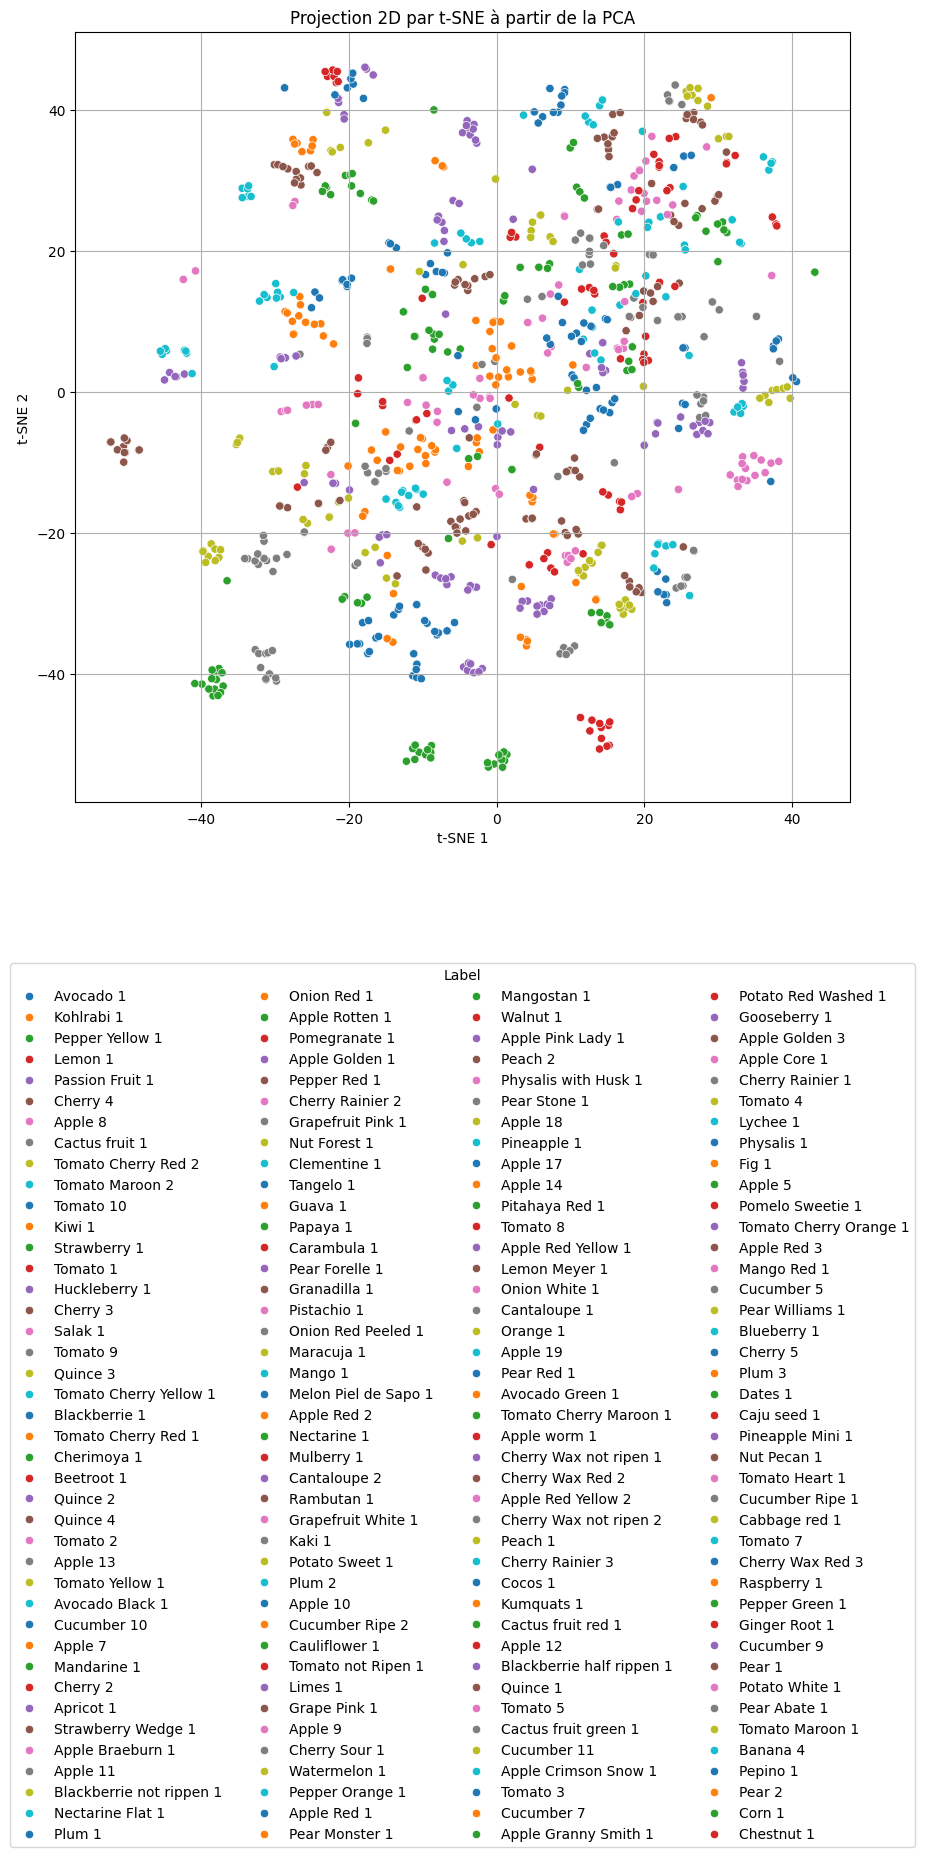

In [30]:
plt.figure(figsize=(10, 10))
scatter = sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y, palette='tab10', legend='full')

plt.title("Projection 2D par t-SNE à partir de la PCA")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)

# Légende en dessous
plt.legend(
    title="Label",
    bbox_to_anchor=(0.5, -0.2),
    loc='upper center',
    ncol=4,              # nombre de colonnes pour la légende
    frameon=True
)

plt.tight_layout()
plt.show()


<u>Rappel du PATH où seront inscrits les fichiers au format "**parquet**" <br />
contenant nos résultats, à savoir, un DataFrame contenant 3 colonnes</u> :
 1. Path des images
 2. Label de l'image
 3. Vecteur de caractéristiques de l'image

In [31]:
print(PATH_Result)

/workspace/data/Results


<u>Enregistrement des données traitées au format "**parquet**"</u> :

In [32]:
from pyspark.ml.functions import vector_to_array

# 1. Conversion du vecteur PCA en tableau
df_pca_array = df_pca.withColumn("pca_array", vector_to_array("pca_features"))

# 2. Optionnel : ne garder que les colonnes utiles
df_to_save = df_pca_array.select("path", "label", "pca_array") 

# 3. Sauvegarde au format Parquet (recommandé pour PySpark)
df_to_save.write.mode("overwrite").parquet(PATH_Result)

# Possible aussi en CSV :
# df_to_save.write.mode("overwrite").csv("pca_output.csv", header=True)

25/07/28 09:38:51 WARN DAGScheduler: Broadcasting large task binary with size 2.8 MiB
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
                                                                                

## 3.8 Chargement des données enregistrées et validation du résultat

<u>On charge les données fraichement enregistrées dans un **DataFrame Pandas**</u> :

In [33]:
df = pd.read_parquet(PATH_Result, engine='pyarrow')

<u>On affiche les 5 premières lignes du DataFrame</u> :

In [34]:
df.head()

,path,label,pca_array
0,file:/workspace/data/fruits-360_100x100/fruits...,Pear Forelle 1,"[3.248596777052845, -8.177016403163458, -0.354..."
1,file:/workspace/data/fruits-360_100x100/fruits...,Quince 3,"[-13.739554972253892, -6.407832444220224, -4.1..."
2,file:/workspace/data/fruits-360_100x100/fruits...,Cherry 5,"[-6.9801051058618535, 18.908936136729295, -13...."
3,file:/workspace/data/fruits-360_100x100/fruits...,Apple 19,"[0.3505067708138221, -6.626631576856984, -2.33..."
4,file:/workspace/data/fruits-360_100x100/fruits...,Cauliflower 1,"[-8.800264891040094, -3.604343254066249, 10.77..."


<u>On valide que la dimension du vecteur de caractéristiques des images est bien de dimension de la PCA</u> :

In [35]:
df.loc[0,'pca_array'].shape

(261,)

Nous venons de valider le processus sur un jeu de données allégé en local <br />
où nous avons simulé un cluster de machines en répartissant la charge de travail <br />
sur différents cœurs de processeur au sein d'une même machine.

Nous allons maintenant généraliser le processus en déployant notre solution <br />
sur un réel cluster de machines et nous travaillerons désormais sur la totalité <br />
des 22819 images de notre dossier "Test".

In [36]:
spark.stop()